This Code analyses titanic dataset. 
I am targeting three main questions:
1. What percentage of children survived the catastrophe?*
2. In those who survived is there any relation to which class the children were in?
3. How many children with no parents and no siblings were on titanic and how many of them survived?

*children as of equal or below age of 18


In [180]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import gridspec
sns.set(style="whitegrid", color_codes=True)
%matplotlib inline

In [181]:
#import file
filename = '/Users/Ania/Documents/CV/Courses/Nanodegree/Titanic/titanic-data.csv'
titanic_df = pd.read_csv(filename)

In [182]:
#quick look at the structure of the data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [183]:
#Quick look at statistics of numerical columns
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [184]:
#Seems that the 'Age' column has different number of entries as opposed to other columns, the remaining cells are empty.
Age = titanic_df.Age[titanic_df.Age.notnull()]
len(Age)

714

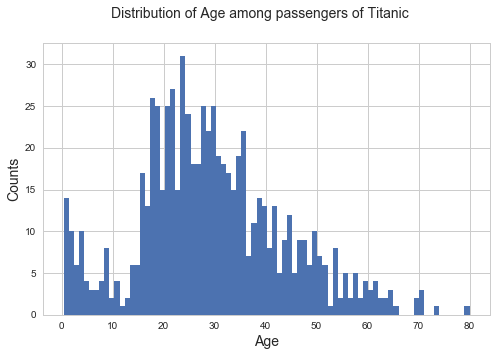

In [185]:
#Lets check what is the overall age distribution on the ship.
fig = plt.figure(figsize = (8, 5))
p0 = titanic_df.Age.hist(bins = 80)
p0.set_xlabel('Age', fontsize = 14)
p0.set_ylabel('Counts', fontsize = 14)
fig.suptitle('Distribution of Age among passengers of Titanic', fontsize = 14)

In [186]:
titanic_df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [192]:
# What are statistical values of of titanic dataframe for children only (below 18 yo)?
titanic_df_ch = titanic_df[titanic_df['Age'].values <= 18]
titanic_df_ch['Age'].dropna()
median_ch = titanic_df.Age[titanic_df['Age'].values <= 18].median()
survived_ch = titanic_df.Survived[titanic_df['Age'].values <= 18].sum()
titanic_df_ch.describe()

/Users/Ania/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in less_equal
  from ipykernel import kernelapp as app
/Users/Ania/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in less_equal
/Users/Ania/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in less_equal


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,445.496403,0.503597,2.561151,10.717050,1.258993,0.935252,32.500721
std,278.724719,0.501795,0.692769,6.465828,1.547968,0.818346,40.759691
min,8.000000,0.000000,1.000000,0.420000,0.000000,0.000000,6.495800
25%,183.500000,0.000000,2.000000,4.000000,0.000000,0.000000,10.816650
50%,436.000000,1.000000,3.000000,13.000000,1.000000,1.000000,20.250000
75%,712.000000,1.000000,3.000000,17.000000,2.000000,2.000000,32.193750
max,876.000000,1.000000,3.000000,18.000000,5.000000,3.000000,262.375000


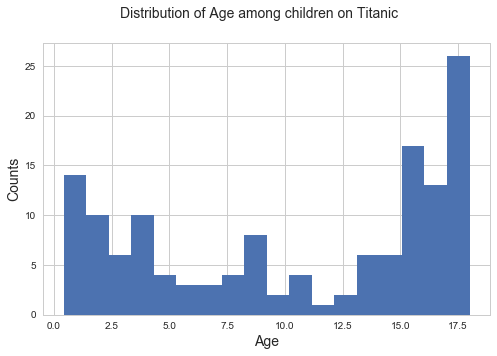

In [193]:
fig = plt.figure(figsize = (8, 5))
p0 = titanic_df_ch.Age.hist(bins = 18)
p0.set_xlabel('Age', fontsize = 14)
p0.set_ylabel('Counts', fontsize = 14)
fig.suptitle('Distribution of Age among children on Titanic', fontsize = 14)

So it looks like there were 139 children aboard (approximately 16% of passengers) with the mean age of approximately 11 yo. (10.72 +/- 6.47) the median of age is 13 yo. Out of 139 children 70 survived the catastrophe (approximtely 50%).

In [194]:
def child_class(class_no):
    class_ch_df = titanic_df_ch[titanic_df_ch['Pclass'].values == class_no]
    class_ch = len(class_ch_df)
    class_ch_surv = np.sum(titanic_df_ch.Survived[titanic_df_ch['Pclass'].values == class_no]) 

    return class_ch, class_ch_surv

print 'The median of age for children is = ', median_ch
print 'The amount of chidren who survived is = ', survived_ch, 'out of total amount of children = ', len(titanic_df_ch)
print 'The amount of chidren in class 1, the amount which survived = ', child_class(1)
print 'The amount of chidren in class 2, the amount which survived = ', child_class(2)
print 'The amount of chidren in class 3, the amount which survived = ', child_class(3)

The median of age for children is =  13.0
The amount of chidren who survived is =  70 out of total amount of children =  139
The amount of chidren in class 1, the amount which survived =  (16, 14)
The amount of chidren in class 2, the amount which survived =  (29, 23)
The amount of chidren in class 3, the amount which survived =  (94, 33)


From statistical point of view the highest probability of survival would have children in the first (P = 87%) and in the second class (P = 79%), while the lowest probability of survival had children in the third class (P = 35%). 

Below is a graph showing the sex-dependent distribution of age for children in three classes. It seems that apart from class 1(male) distributions are more or less bimodal however we would need more datapoints to clarify this with certainty. 

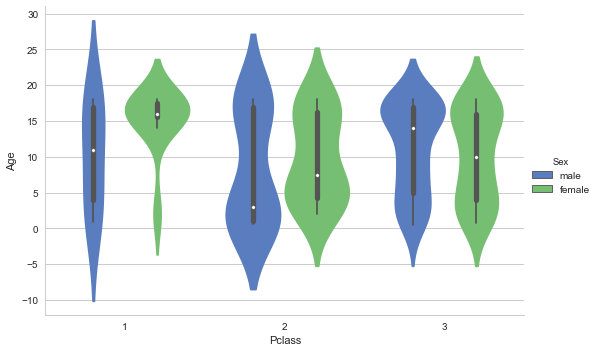

In [195]:
fig = plt.figure()
g1 = sns.factorplot(x = 'Pclass', y='Age', hue = 'Sex', data=titanic_df_ch, kind = 'violin', size = 5, aspect = 1.5, palette= 'muted')

Next lets find out how many children had no siblings and no parents and how many of them survived.

In [196]:
#I use operation or since this will give me False only for 0 | 0. Later the invert function invert prints the True value to children with no parents and no siblings
titanic_df_ch['No_sibl'] = (titanic_df_ch.SibSp==0)
titanic_df_ch['No_par'] = (titanic_df_ch.Parch==0)
titanic_df_ch['No_sibl_par'] = np.invert(titanic_df_ch['No_sibl'] | titanic_df_ch['No_par'])

print 'The amount of children without parents and siblings was = ', len(titanic_df_ch[titanic_df_ch['No_sibl_par'].values == True])
print 'The amount of children survived from this group was = ', (titanic_df_ch.Survived[titanic_df_ch['No_sibl_par'].values == True].sum())
print 'The amount of children with parents or siblings was = ', len(titanic_df_ch[titanic_df_ch['No_sibl_par'].values == False])
print 'The amount of children survived from this group was = ', (titanic_df_ch.Survived[titanic_df_ch['No_sibl_par'].values == False].sum())


The amount of children without parents and siblings was =  64
The amount of children survived from this group was =  28
The amount of children with parents or siblings was =  75
The amount of children survived from this group was =  42


/Users/Ania/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/Ania/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/Ania/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF